In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Add Matplotlib notebook to make it interactive 
%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read the city data file and store it in a pandas DataFrame.
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame.
ride_data_df=pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


## Inspect the City Data DataFrame

In [6]:
# Get the columns and the rows that are not null.
#city_data_df.count()
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [7]:
# Get the columns and the rows that are not null.
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get the data types of each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [11]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [12]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

## Inspect Ride Data DataFrame


In [13]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

## Merge DataFrames

In [16]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head(10)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


**N.B.** The terms **scatter plot** and **scatter chart**, as well as **bubble chart** and **bubble plot**, are often used interchangeably in the data visualization field.

## Create a DataFrame for Each Type of city

In [17]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [18]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [19]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


## Get the Number of Rides for Each City Type

In [20]:
urban_ride_count=urban_cities_df.groupby("city").count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [21]:
suburban_ride_count=suburban_cities_df.groupby("city").count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [22]:
rural_ride_count=rural_cities_df.groupby("city").count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

## Get the Average Fare for Each City Type

In [23]:
# Get average fare for each city in the urban cities.
urban_avg_fare=urban_cities_df.groupby('city').mean()['fare'] 
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [24]:
# Get average fare for each city in the suburban cities.
suburban_avg_fare=suburban_cities_df.groupby('city').mean()["fare"] 
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [25]:
# Get average fare for each city in the rural cities.
rural_avg_fare=rural_cities_df.groupby('city').mean()["fare"] 
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

## Get the Average Number of Drivers for Each City Type

In [26]:
# Get the average number of drivers for each urban city.
urban_driver_count=urban_cities_df.groupby('city').mean()['driver_count'] 
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [27]:
# Get the average number of drivers for each suburban city.
suburban_driver_count=suburban_cities_df.groupby('city').mean()['driver_count'] 
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [28]:
# Get the average number of drivers for each rural city.
rural_driver_count=rural_cities_df.groupby('city').mean()['driver_count'] 
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

## Create Bubble Charts for Each City Type

<IPython.core.display.Javascript object>


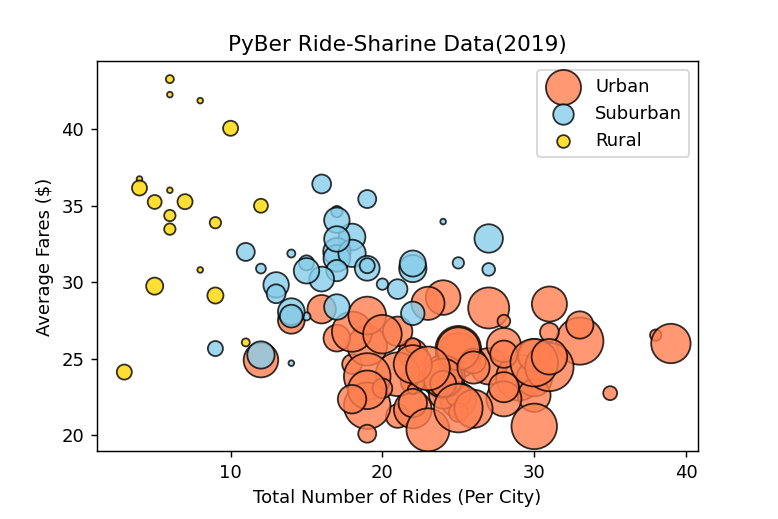

Text(0, 0.5, 'Average Fares ($)')

In [29]:
# Build the scatter plots for urban cities.
plt.scatter(
            urban_ride_count,
            urban_avg_fare, 
            s= 10*urban_driver_count,
            color='coral',
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban"
             )
plt.legend()
plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

In [30]:
# Build the scatter plots for suburban cities.
plt.scatter(
            suburban_ride_count,
            suburban_avg_fare, 
            s= 10*suburban_driver_count,
            color='skyblue',
            edgecolors="black",
            linewidth=1,  
            alpha=0.8,
            label="Suburban"
             )
plt.legend()
plt.grid(True)
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

Text(0, 0.5, 'Average Fares ($)')

In [31]:
# Build the scatter plots for rural cities.
plt.scatter(
            rural_ride_count,
           rural_avg_fare, 
            s= 10*rural_driver_count,
            color='gold',
            edgecolors="black",
            linewidth=1,
            alpha=0.8,
            label="Rural"
             )
plt.legend()
plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')

Text(0, 0.5, 'Average Fares ($)')

## Create Bubble Charts

<IPython.core.display.Javascript object>


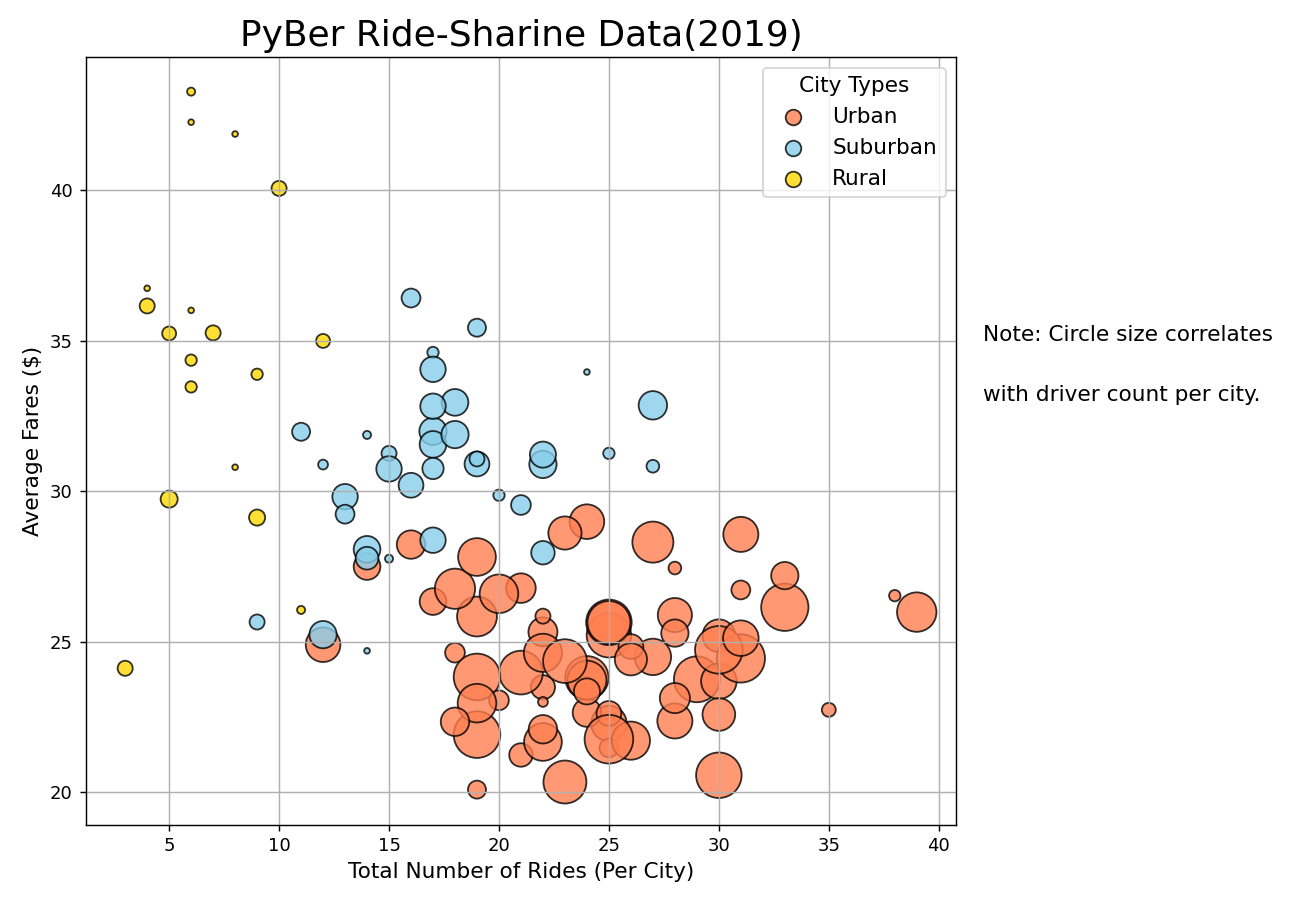

In [32]:
plt.figure(figsize = (10,7))
# Add the scatter charts for each type of city.
plt.scatter(
            urban_ride_count,
            urban_avg_fare, 
            s= 10*urban_driver_count,
            color='coral',
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Urban"
             )

plt.scatter(
            suburban_ride_count,
            suburban_avg_fare, 
            s= 10*suburban_driver_count,
            color='skyblue',
            edgecolors="black",
            linewidth=1,  
            alpha=0.8,
            label="Suburban"
             )

plt.scatter(
            rural_ride_count,
            rural_avg_fare, 
            s= 10*rural_driver_count,
            color='gold',
            edgecolors="black",
            linewidth=1,
            alpha=0.8,
            label="Rural"
             )


plt.grid()
plt.title("PyBer Ride-Sharine Data(2019)",fontsize=20)
plt.xlabel('Total Number of Rides (Per City)',fontsize=12)
plt.ylabel('Average Fares ($)',fontsize=12)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.(42,35) are the x &y coordinated for the text
plt.text(42, 35, "Note: Circle size correlates" , fontsize="12")
plt.text(42, 33,   "with driver count per city.", fontsize="12")

#show the plot 
plt.show()

# Save the figure.
plt.tight_layout()
plt.savefig("Analysis/Fig1.png")


**More Info**
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

## Summary Statistics for Number of Rides by City Type

In [33]:
# Get summary statistics for urban cities
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [34]:
# Get summary statistics for suburban cities
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [35]:
# Get summary statistics for rural cities
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [36]:
# Get summary statistics of the ride count for urban cities.
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [37]:
# Get summary statistics of the ride count for suburban cities.
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [38]:
# Get summary statistics of the ride count for rural cities.
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

**Calculate the mean() of the ride for each city type**

In [39]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

**Calculate the median() of the ride for each city type**

In [40]:
# Calculate the median of the ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)


(24.0, 17.0, 6.0)

**Calculate the mode() of the ride for each city type** <br /> 
The output will be the mode or modes of the Series. 

In [41]:
# Calculate the mode of the ride count for each city type.
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)


(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

### NumPy mean() and median() Functions and SciPy mode() Function / Measures of Central Tendency 

Before starting we should import NumPy and the stats module from SciPy. <br /> 
import numpy as np <br /> 
import scipy.stats as sts

In [42]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


**N.B.** Mean and meadian values are the same <br/>
Unlike the Pandas mode() method, the sts.mode() method returns 2 attributes: 
- The first attribute, mode, is 22.
- The second attribute, count, is the number of times the mode appears in the dataset.

In [43]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count=np.mean(suburban_ride_count)
print(f"The mean of the ride count for suburban trips is {mean_suburban_ride_count: .2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean of the ride count for suburban trips is  17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [44]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count=np.mean(rural_ride_count)
print(f"The mean of the ride count for rural trips is {mean_rural_ride_count: .2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean of the ride count for rural trips is  6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


**Summary** <br/>
We can notice that the average of ride count is higher in urban cities (24.62) than in suburban (17.36) and rural (6.94) cities.

## Summary Statistics for the Fare by City Type
This will help you determine which city types are generating the most money.

In [45]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [46]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [47]:
# Get the fares for the Suburban cities.
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [48]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [49]:
# Get the fares for the Rural cities.
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [50]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


**Summary** <br/>
The average fare price is higher in rural cities ($34.62) than in suburban ($30.97) and urban ($24.53) ones.

## Summary Statistics for the Number of Drivers by City Type
Create a Series for each city type based on the driver_count column

In [51]:
# Get the driver count data from the urban cities.
urban_drivers=urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [52]:
# Calculate the measures of central tendency for the number of ride for the urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean driver count for urban trips is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median driver count for urban trips is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode driver count for urban trips is {mode_urban_drivers}.")

The mean driver count for urban trips is 36.68.
The median driver count for urban trips is $37.00.
The mode driver count for urban trips is ModeResult(mode=array([39]), count=array([86])).


In [53]:
# Get the driver count data from the suburban cities.
suburban_drivers=suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [54]:
# Calculate the measures of central tendency for the number of ride for the suburban cities.
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean driver count for suburban trips is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median driver count for suburban trips is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode driver count for suburban trips is {mode_suburban_drivers}.")

The mean driver count for suburban trips is 13.71.
The median driver count for suburban trips is $16.00.
The mode driver count for suburban trips is ModeResult(mode=array([20]), count=array([79])).


In [55]:
# Get the driver count data from the rural cities.
rural_drivers=rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [56]:
# Calculate the measures of central tendency for the number of ride for the rural cities.
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean driver count for rural trips is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median driver count for rural trips is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode driver count for rural trips is {mode_rural_drivers}.")

The mean driver count for rural trips is 4.30.
The median driver count for rural trips is $4.00.
The mode driver count for rural trips is ModeResult(mode=array([1]), count=array([32])).


**Summary** <br/>
We can clearly see that the average number of drivers is the lowest in rural citirs (4.3) while it's around 14 in suburban cities and around 37 in urban cities. This could explain the reason of having the lowest fare prices in urban cities. When the competition is higher, the prices are lower.

## Create Box-and-Whisker Plots for Ride Count Data

<IPython.core.display.Javascript object>


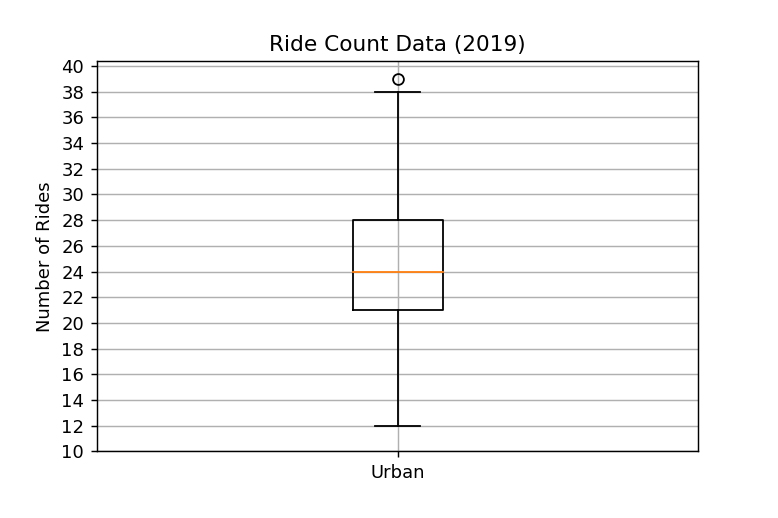

In [57]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

**Add all ride count box-and-whisker plots to the same graph.**

<IPython.core.display.Javascript object>


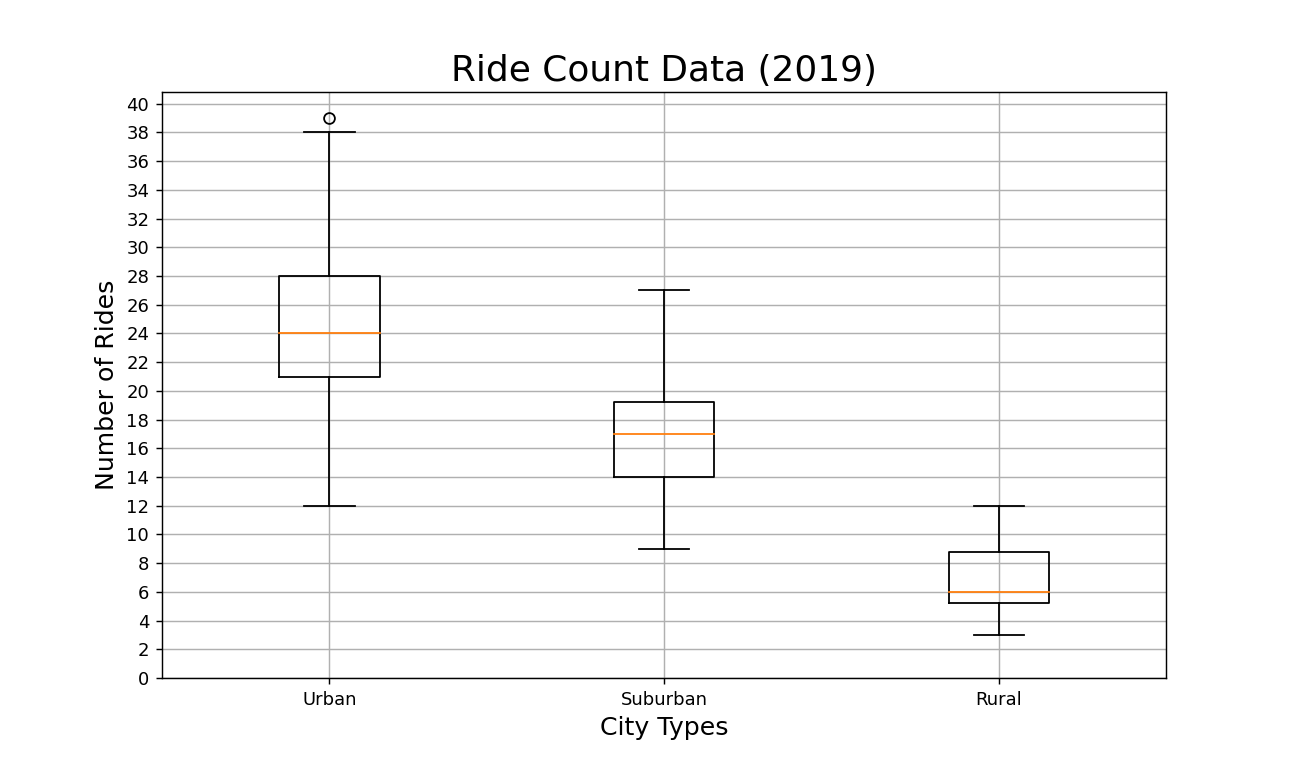

In [58]:
# Add all ride count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_count_data= [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data, 
           labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 41, step=2.0))
ax.grid()

#Save the Fig
plt.savefig("Analysis/Fig2.png")
plt.show()

**Finding** <br/>
There is one outlier in the urban ride count data. Also, the average number of rides in the rural cities is about 4- and 3.5-times lower per city than the urban and suburban cities, respectively.

In [59]:
# Get the city that matches 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")     


West Angela has the highest rider count.


## Create Box-and-Whisker Plots for Ride Fare Data

<IPython.core.display.Javascript object>


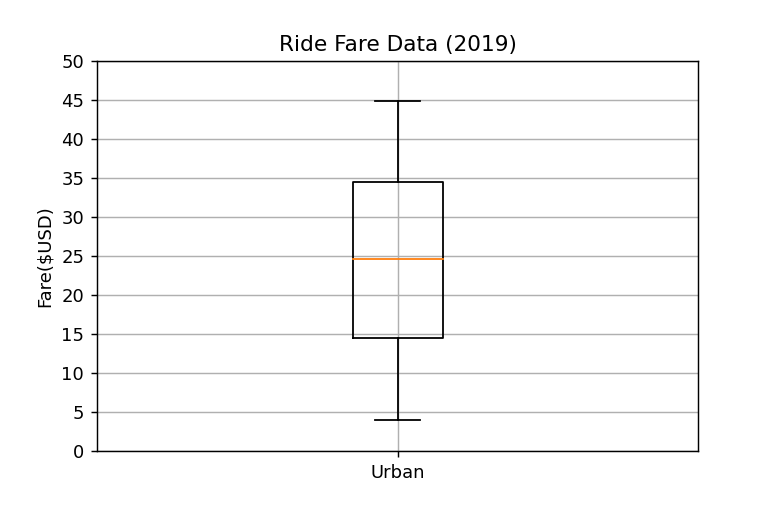

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [60]:
# Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, 
           labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

<IPython.core.display.Javascript object>


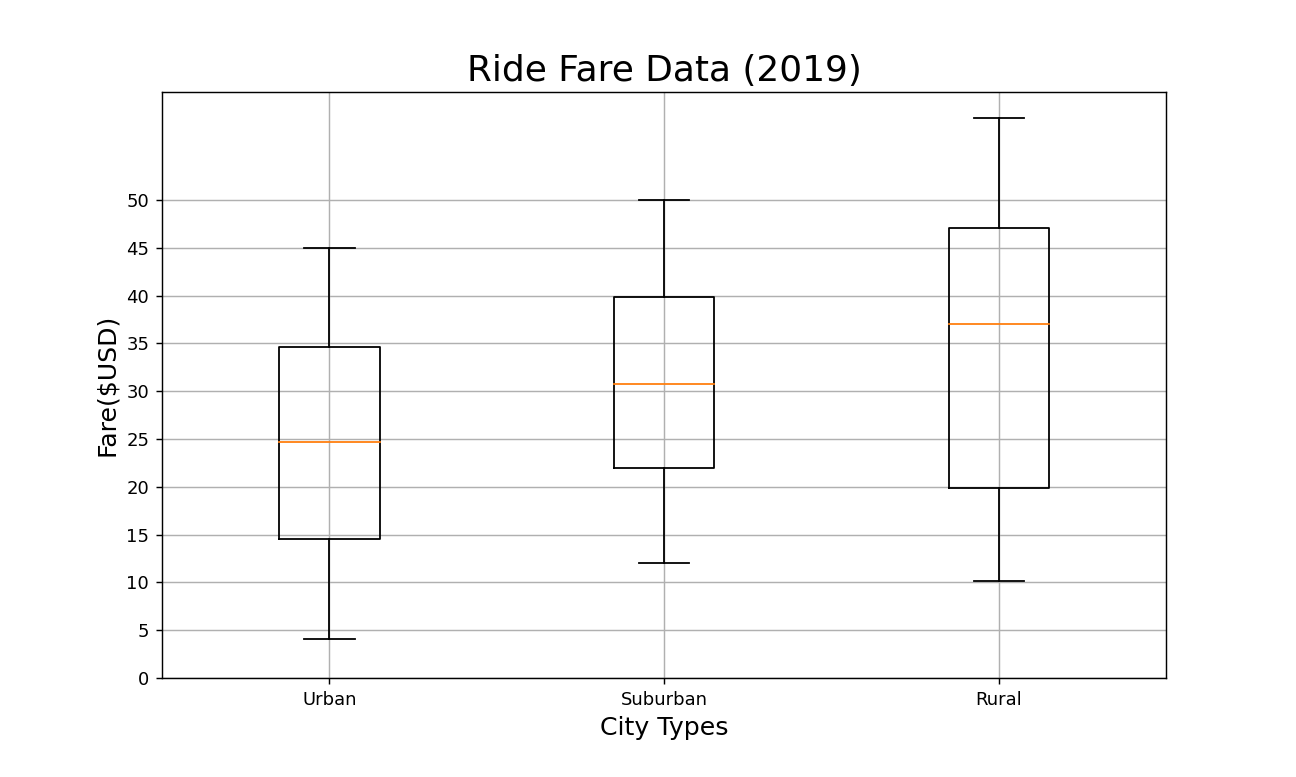

In [61]:
# Add all fare count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_fares_data= [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_fares_data, 
           labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

#Save the Fig
plt.savefig("Analysis/Fig3.png")
plt.show()

**Finding** <br/>
From the combined box-and-whisker plots, we see that there are no outliers. However, the average fare for rides in the rural cities is about $11 and $5 more per ride than the urban and suburban cities, respectively. 

## Create Box-and-Whisker Plots for Driver Count Data

<IPython.core.display.Javascript object>


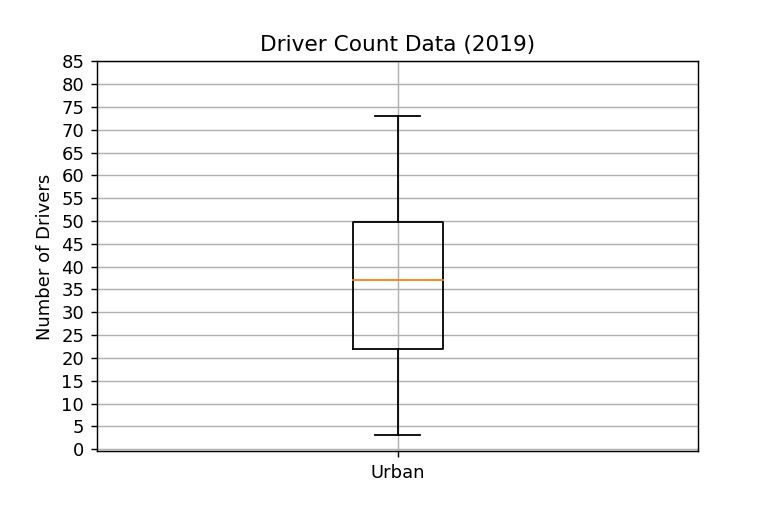

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [62]:
# Create a box-and-whisker plot for driver count data in urban cities.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_driver_count, 
           labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

<IPython.core.display.Javascript object>


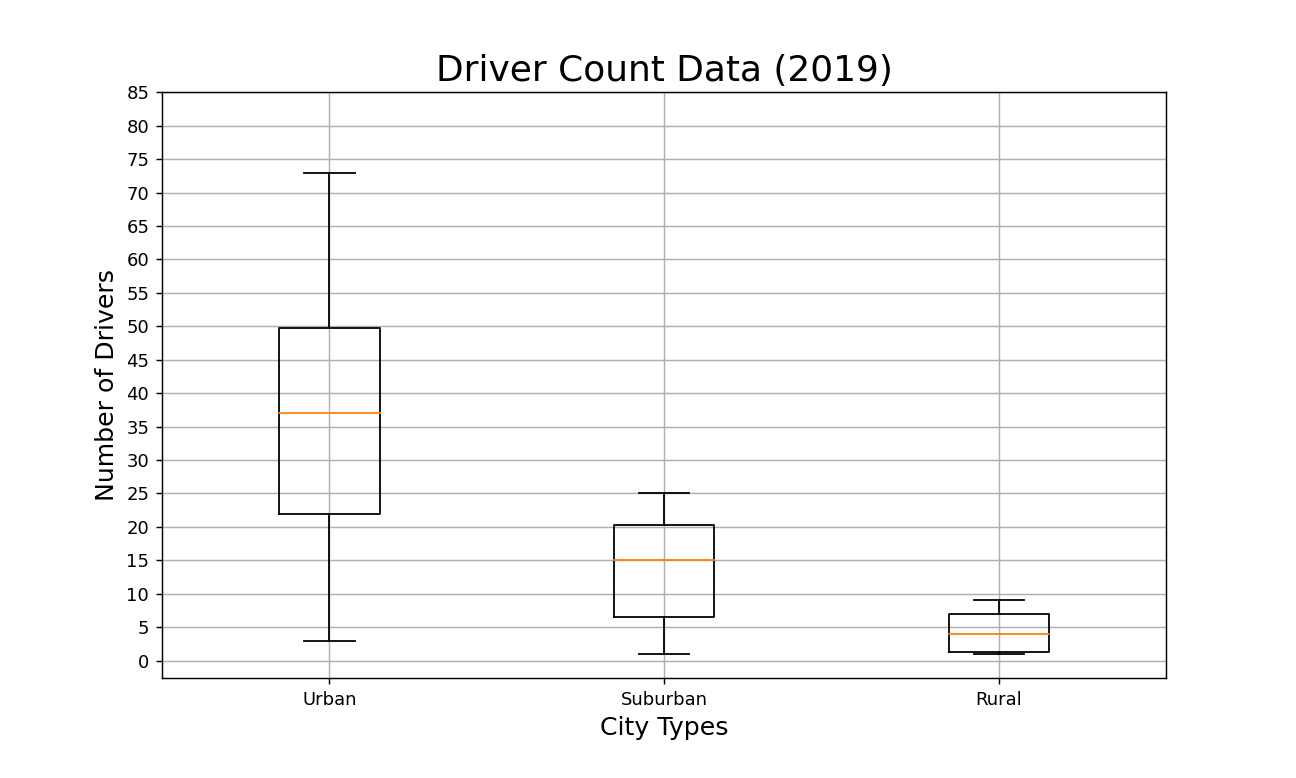

In [63]:
# Add all driver count box-and-whisker plots to the same graph.
x_labels = ["Urban","Suburban","Rural"]
ride_drivers_data= [urban_driver_count, suburban_driver_count, rural_driver_count]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_drivers_data, 
           labels = x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

#Save the Fig
plt.savefig("Analysis/Fig4.png")
plt.show()


## Get the Percentage of Fares for Each City Type
**Calculate the sum of the fares for each city type**

In [64]:
# Get the sum of the fares for Urban city type - using loc
sum_fare_urban= pyber_data_df.loc[pyber_data_df["type"] == "Urban", "fare"].sum()
sum_fare_urban.round(2)


39854.38

In [65]:
# Get the sum of the fares for suburban city type - using loc
sum_fare_suburban= pyber_data_df.loc[pyber_data_df["type"] == "Suburban", "fare"].sum()
sum_fare_suburban.round(2)

19356.33

In [66]:
# Get the sum of the fares for rural city type - using loc
sum_fare_rural= pyber_data_df.loc[pyber_data_df["type"] == "Rural", "fare"].sum()
sum_fare_rural.round(2)

4327.93

**Get the total fare**

In [67]:
# Get the sum of all the fares.
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

**Calculate the percentage of total fares for each city type**

In [68]:
# Calculate the percentage of fare for urban cities.
urban_percentage= (sum_fare_urban/total_fares)*100
urban_percentage

62.72463496228438

In [69]:
# Calculate the percentage of fare for suburban cities.
suburban_percentage= (sum_fare_suburban/total_fares)*100
suburban_percentage

30.46387206273222

In [70]:
# Calculate the percentage of fare for rural cities.
rural_percentage= (sum_fare_rural/total_fares)*100
rural_percentage

6.81149297498341

In [71]:
type_percents=[urban_percentage.round(2), suburban_percentage.round(2),rural_percentage.round(2)]
type_percents

[62.72, 30.46, 6.81]

In [72]:
# Calculate the percentage of fare for each city type.
#type_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
#type_percents

<IPython.core.display.Javascript object>


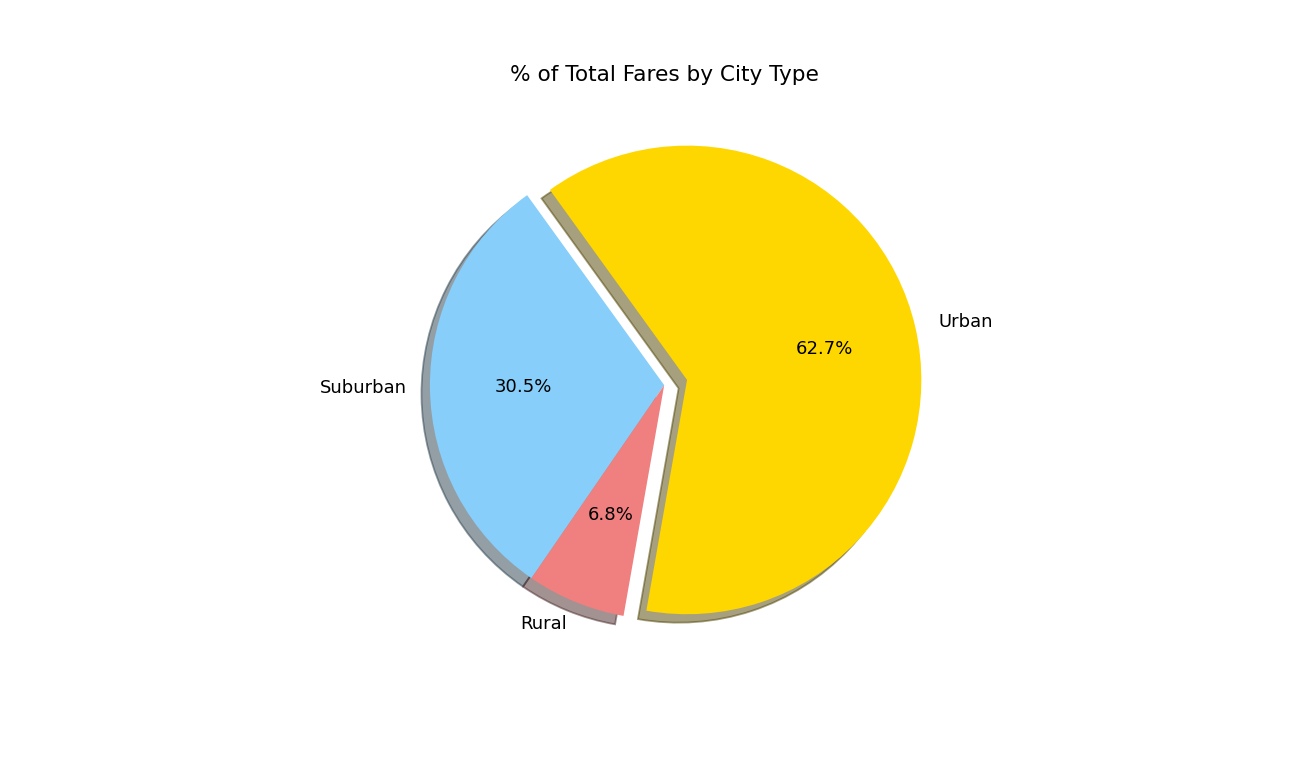

In [73]:
import matplotlib as mpl
#Build Pie Chart
plt.subplots(figsize=(10, 6))

labels=["Urban","Suburban","Rural"]
colors=["gold", "lightskyblue", "lightcoral"]

plt.pie(type_percents,
       labels=labels,
       explode=[0.1,0,0],
       startangle=260, 
       shadow=True,
       colors=colors,
       autopct="%1.1f%%")

plt.title("% of Total Fares by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig("Analysis/Fig5.png")
plt.show()

## Get the Percentage of Rides for Each City Type

In [74]:
# Get the count of the rides for Urban city type - using loc
count_rides_urban= pyber_data_df.loc[pyber_data_df["type"] == "Urban", "driver_count"].count()
count_rides_urban


1625

In [75]:
# Get the count of the rides for Subrban city type - using loc
count_rides_suburban= pyber_data_df.loc[pyber_data_df["type"] == "Suburban", "driver_count"].count()
count_rides_suburban


625

In [76]:
# Get the count of the rides for rural city type - using loc
count_rides_rural= pyber_data_df.loc[pyber_data_df["type"] == "Rural", "driver_count"].count()
count_rides_rural

125

In [77]:
#Get the total number of rides
total_rides_count = pyber_data_df["driver_count"].count()
total_rides_count 

2375

In [78]:
#Get the % of Rides for each city types
urban_ride_percentage=(count_rides_urban/total_rides_count)*100
suburban_ride_percentage=(count_rides_suburban/total_rides_count)*100
rural_ride_percentage=(count_rides_rural/total_rides_count)*100
rides_percents=[urban_ride_percentage.round(2), rural_ride_percentage.round(2),suburban_ride_percentage.round(2)]
rides_percents

[68.42, 5.26, 26.32]

<IPython.core.display.Javascript object>


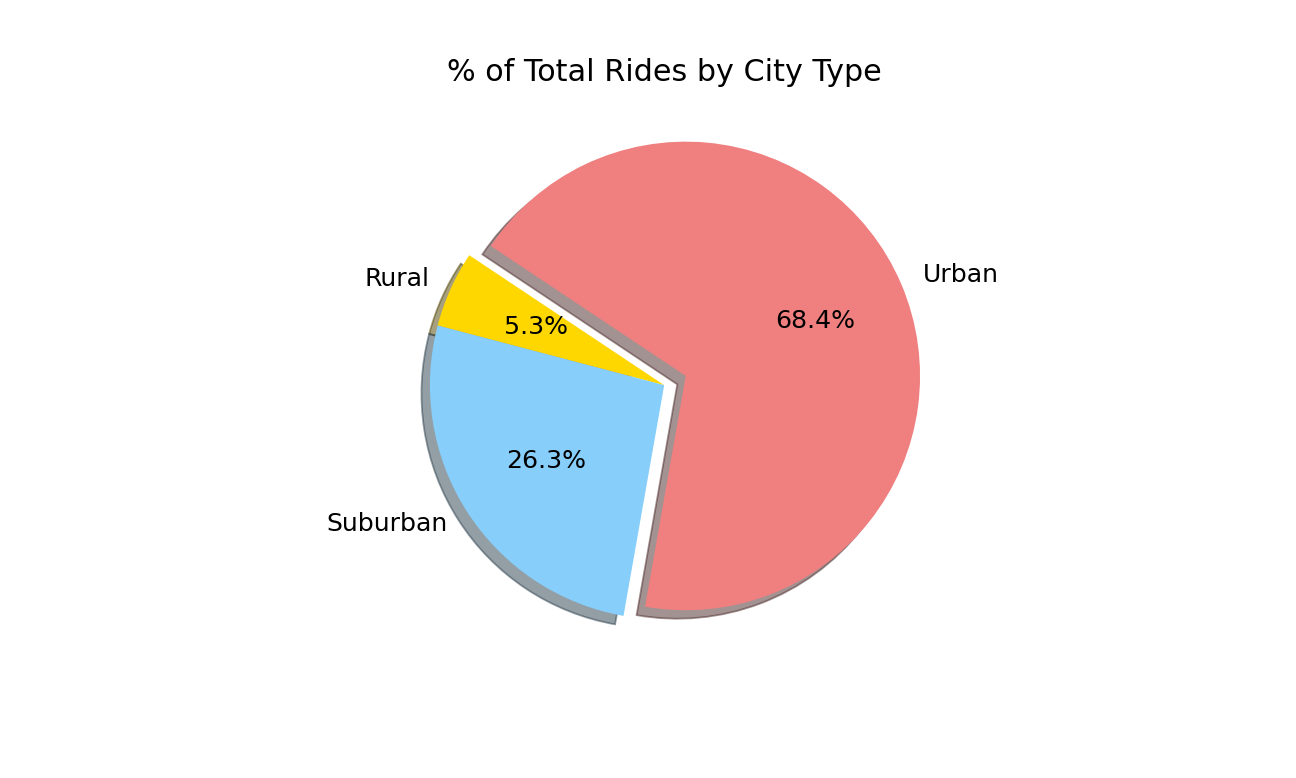

In [79]:
#Build Pie Chart
plt.subplots(figsize=(10, 6))

labels=["Urban","Rural","Suburban"]
colors=["lightcoral", "gold", "lightskyblue"]

plt.pie(rides_percents,
       labels=labels,
       explode=[0.1,0,0],
       startangle=260, 
       shadow=True,
       colors=colors,
       autopct="%1.1f%%")

plt.title("% of Total Rides by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 20

#Save Figure
plt.savefig("Analysis/Fig6.png")
plt.show()

## Get the Percentage of Total Drivers for Each City Type

In [80]:
# Get the sum of the rides for Urban city type - using loc
count_drivers_urban= pyber_data_df.loc[pyber_data_df["type"] == "Urban", "driver_count"].sum()
count_drivers_urban


59602

In [81]:
# Get the sum of the rides for Subrban city type - using loc
count_drivers_suburban= pyber_data_df.loc[pyber_data_df["type"] == "Suburban", "driver_count"].sum()
count_drivers_suburban

8570

In [82]:
# Get the sum of the rides for rursal city type - using loc
count_drivers_rural= pyber_data_df.loc[pyber_data_df["type"] == "Rural", "driver_count"].sum()
count_drivers_rural

537

In [83]:
#Get the total sum of rides
total_drivers_sum = pyber_data_df["driver_count"].sum()
total_drivers_sum 

68709

In [84]:
urban_drivers_percent=(count_drivers_urban/total_drivers_sum)*100
suburban_drivers_percent=(count_drivers_suburban/total_drivers_sum)*100
rural_drivers_percent=(count_drivers_rural/total_drivers_sum)*100
drivers_percents=[rural_drivers_percent,suburban_drivers_percent,urban_drivers_percent]
drivers_percents

[0.7815570012662096, 12.472892925235413, 86.74555007349838]

<IPython.core.display.Javascript object>


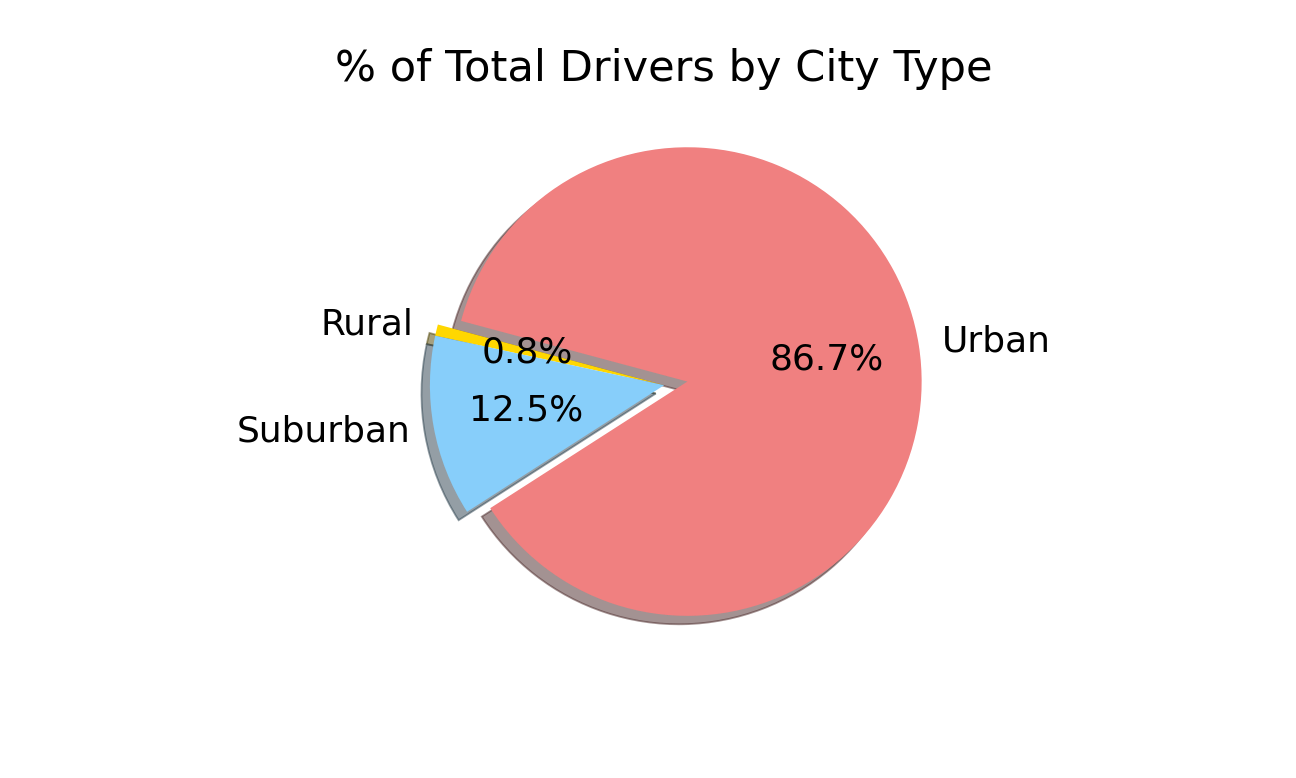

In [85]:
#Build Pie Chart
plt.subplots(figsize=(10, 6))

labels=["Rural","Suburban","Urban"]
colors=["gold", "lightskyblue", "lightcoral"]

plt.pie(drivers_percents,
       labels=labels,
       explode=[0,0,0.1],
       startangle=165, 
       shadow=True,
       colors=colors,
       autopct="%1.1f%%")

plt.title("% of Total Drivers by City Type")

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

#Save Figure
plt.savefig("Analysis/Fig7.png")
plt.show()